# 2D Crack propagation in a bended beam

 - @todo: Plot the residual value
 - @todo: State dependencies - recalculate upon material parameter change

\begin{align}
\sigma_\mathrm{F} = E w / L_\mathrm{eff}
\end{align}

In [1]:
import sympy as sp
xi = sp.Symbol(r'\xi')
G_f0 = sp.Symbol(r'G_{f0}')
a = 1.038
b = 0.245
G_f = (1 + (a/(1+b/xi)) - (1 + a + b)/(1 + b) * xi**8) #G_f0 * 
get_G_F = sp.lambdify((xi,G_f0), G_f, 'numpy') 
get_G_F

<function _lambdifygenerated(Dummy_23, Dummy_24)>

<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (-1.83373493975904*Dummy_23**8 + 1 + 1.038/(1 + 0.245/Dummy_23))
No handles with labels found to put in legend.


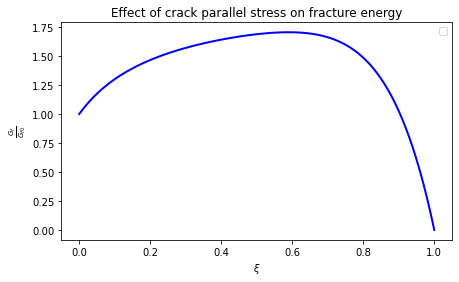

In [2]:
import matplotlib.pylab as plt
from bmcs_cross_section.api import ReinfLayer
import numpy as np
_, (ax1) = plt.subplots(1, 1, figsize=(7,4))
xi = np.linspace(0,1,100)
G_f0 = 86.7
G_f = get_G_F(xi, G_f0)
ax1.plot(xi, G_f , color = 'blue', lw= 2);
ax1.set_xlabel(r'$\xi$'); ax1.set_ylabel(r'$\frac{G_f}{G_{f0}}$');
ax1.set_title(r'Effect of crack parallel stress on fracture energy')
ax1.legend()
plt.savefig("D:\Shear zones\Python plots\Bazanttest.pdf")

In [3]:
# %matplotlib widget
# import bmcs_utils.api as bu
# from bmcs_shear.shear_crack.crack_propagation import CrackPropagation
# ce = CrackPropagation(n_seg=5)
# ce.sz_bd.cmm.trait_set(tau_1 = 4, s_1 = 0.2, tau_2 = 3, tau_3 = 2, s_2 = 1.4, s_3 = 5)
# ce.sz_bd.cmm.trait_set(f_c = 33.3, f_t = 0.3 * 33.3 **(2/3), d_a = 16)
# ce.sz_bd.Rectangle = True
# ce.sz_bd.trait_set(H=600, B=250, L=3870)
# ce.sz_cp.trait_set(x_00=ce.sz_bd.L * 0.5, n_m = 15)
# ce.sz_cp.sz_ctr.trait_set(ell = 2)
# ce.sz_bd.cross_section_layout.reinforcement.z_j[0] = 44
# ce.sz_bd.cross_section_layout.reinforcement.A_j[0] = 615.44 #2 no 28
# ce.sz_bd.cross_section_layout.reinforcement.E_j[0] = 210000 / 100

In [4]:
%matplotlib widget
import numpy as np
import bmcs_utils.api as bu
from bmcs_shear.shear_crack.crack_propagation import CrackPropagation
ce = CrackPropagation(n_seg=202)
#ce.sz_bd.cmm.trait_set(tau_1 = 4, s_1 = 0.2, tau_2 = 3, tau_3 = 2, s_2 = 1.4, s_3 = 5)
#ce.sz_bd.cmm.trait_set(f_c = 33.3, f_t = 0.3 * 33.3 **(2/3), d_a = 16)
ce.sz_bd.Rectangle = True
ce.sz_bd.trait_set(H=600, B=250, L=3850)
ce.sz_cp.trait_set(x_00=ce.sz_bd.L * 0.1, n_m = 4)
ce.sz_cp.sz_ctr.L_fps = 80
ce.sz_cp.sz_ctr.trait_set(ell = 2)

bl1 = ReinfLayer(name='layer1', z=44, A=ce.sz_bd.smm.A_f, matmod='steel')
bl1.matmod_.trait_set(E=ce.sz_bd.smm.E_f, f_t=ce.sz_bd.smm.sig_y)
ce.sz_bd.cross_section_layout.add_layer(bl1)
ce.sz_bd
#F_La, F_Na, F_m, Q_reduce, c_p = ce.analyze() 
#print(F_La, F_Na, c_p)

In [5]:
# bu.InteractiveWindow([ce, ce.sz_bd, ce.sz_bd.cross_section_layout, 
#                       ce.sz_stress_profile, 
#                       ce.sz_bd.cmm, ce.sz_bd.smm, ce.sz_cp, ce.sz_cp.sz_ctr]).interact()
ce.interact()

<lambdifygenerated-27>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan))


In [6]:
import numpy as np
import matplotlib.pylab as plt
from bmcs_shear.shear_crack.crack_propagation import CrackPropagation
n = 198
ce = CrackPropagation(n_seg=n)
ce.sz_bd.Rectangle = True
ce.sz_bd.trait_set(H=600, B=250, L=3850)
crack_positions = np.linspace(0.1 * ce.sz_bd.L, 0.9 * ce.sz_bd.L, 9)
ce.sz_cp.sz_ctr.L_fps = 80
ce.sz_cp.sz_ctr.trait_set(ell = 2)
bl1 = ReinfLayer(name='layer1', z=44, A=ce.sz_bd.smm.A_f, matmod='steel')
bl1.matmod_.trait_set(E=ce.sz_bd.smm.E_f, f_t=ce.sz_bd.smm.sig_y)
ce.sz_bd.cross_section_layout.add_layer(bl1)
ce.sz_bd
F_beam = []
v_beam = []
for crack_position in crack_positions:
    ce.reset()
    ce.sz_cp.trait_set(x_00=crack_position)
    ce.run()
    F_beam_ = np.array(ce.F_beam) / 1000
    v_beam_ = np.array(ce.v_n)
    #F_beam_col = F_beam_[np.newaxis, :]
    #v_beam_col = v_beam_[np.newaxis, :]
    #F_beam = np.vstack(F_beam_[:, np.newaxis])
    #v_beam = np.vstack(v_beam_[:, np.newaxis])
    F_beam.append(F_beam_)
    v_beam.append(v_beam_)
    #_, ax1 = plt.subplots(1, 1, figsize=(11,4))
    #ax1.plot(v_beam,  F_beam, color = 'blue', lw= 2, label = r'$F$'); #/1000#
    #ax1.set_xlabel(r'$\mathrm{Deflection\,(mm)}$'); ax1.set_ylabel(r'$F\,(kN)$');
    #ax1.set_title(r'Load Deflection')
    print('**************')
    print(crack_position)
    print(np.max(F_beam))
    #print(F_beam)
# for crack_position in crack_positions:
#     ce.reset()
#     ce.sz_cp.trait_set(x_00=crack_position)
#     ce.sz_cp.sz_ctr.L_fps = 80
#     ce.run()
#     F_beam_ = ce.F_beam
#     v_beam_ = ce.v_n
#F_beam.append(F_beam_)
#v_beam.append(v_beam_)


<lambdifygenerated-36>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan))
<lambdifygenerated-38>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less(w, (1/2)*A_f*Dummy_181**2/(Dummy_182*Dummy_183*p)),True], [sqrt(2)*sqrt(A_f)*sqrt(Dummy_182)*sqrt(Dummy_183)*sqrt(p)*sqrt(w),A_f*Dummy_181], default=nan))
<lambdifygenerated-35>:2: RuntimeWarning: overflow encountered in exp
  return (select([less(f_c, -35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w),less_equal(w, 0.028*d_a**0.32*f_c**0.18/f_t),True], [-f_c,35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w,f_t*exp(-35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t*(-0.028*d_a**0.32*f_c**0.18/f_t + w))], default=nan))


**************
385.0
132.91390211146467


<lambdifygenerated-35>:2: RuntimeWarning: overflow encountered in multiply
  return (select([less(f_c, -35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w),less_equal(w, 0.028*d_a**0.32*f_c**0.18/f_t),True], [-f_c,35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w,f_t*exp(-35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t*(-0.028*d_a**0.32*f_c**0.18/f_t + w))], default=nan))


**************
770.0
133.34605053757574
**************
1155.0
143.10746925716086
**************
1540.0
171.25537496511004
**************
1925.0
192.963337977149
**************
2310.0
209.0496715922672
**************
2695.0
246.6655761381657
**************
3080.0
321.3263740119654
**************
3465.0
523.6543558123033


In [7]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))
ax1.plot(v_beam[0],  F_beam[0], lw= 2, label = r'$0.1L$'); #/1000#
ax1.plot(v_beam[1],  F_beam[1], lw= 2, label = r'$0.2L$');
ax1.plot(v_beam[2],  F_beam[2], lw= 2, label = r'$0.3L$');
ax1.plot(v_beam[3],  F_beam[3], lw= 2, label = r'$0.4L$');
ax1.plot(v_beam[4],  F_beam[4], lw= 2, label = r'$0.5L$');
ax1.plot(v_beam[5],  F_beam[5], lw= 2, label = r'$0.6L$');
ax1.plot(v_beam[6],  F_beam[6], lw= 2, label = r'$0.7L$');
ax1.plot(v_beam[7],  F_beam[7], lw= 2, label = r'$0.8L$');
ax1.plot(v_beam[8],  F_beam[8], lw= 2, label = r'$0.9L$');
ax1.set_xlabel(r'$\mathrm{Deflection\,(mm)}$'); ax1.set_ylabel(r'$F\,(kN)$');
ax1.set_title(r'Load Deflection')
ax1.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
fig, ax = plt.subplots(1,1, figsize = (10, 4))
n = 198
ce = CrackPropagation(n_seg=n)
ce.sz_bd.Rectangle = True
ce.sz_bd.trait_set(H=600, B=250, L=3850)
crack_positions = np.linspace(0.1 * ce.sz_bd.L, 0.9 * ce.sz_bd.L, 9)
ce.sz_cp.sz_ctr.L_fps = 80
ce.sz_cp.sz_ctr.trait_set(ell = 2)
bl1 = ReinfLayer(name='layer1', z=44, A=ce.sz_bd.smm.A_f, matmod='steel')
bl1.matmod_.trait_set(E=ce.sz_bd.smm.E_f, f_t=ce.sz_bd.smm.sig_y)
ce.sz_bd.cross_section_layout.add_layer(bl1)
ce.sz_bd
x_Ia = []
for crack_position in crack_positions:
    ce.reset()
    ce.sz_cp.trait_set(x_00=crack_position)
    ce.run()
    sz_cp =ce.sz_cp
    x_n_a =sz_cp.x_t_Ia[0,:]
    x_Ia = sz_cp.x_t_Ia
    ds = ce.crack_tip_orientation.crack_tip_shear_stress.sz_stress_profile.ds
    ce.sz_cp.plot_sz0(ax)
    ds.plot_sz1(ax)
    #print(x_Ia)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<lambdifygenerated-44>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan))
<lambdifygenerated-46>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less(w, (1/2)*A_f*Dummy_202**2/(Dummy_203*Dummy_204*p)),True], [sqrt(2)*sqrt(A_f)*sqrt(Dummy_203)*sqrt(Dummy_204)*sqrt(p)*sqrt(w),A_f*Dummy_202], default=nan))
<lambdifygenerated-43>:2: RuntimeWarning: overflow encountered in exp
  return (select([less(f_c, -35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w),less_equal(w, 0.028*d_a**0.32*f_c**0.18/f_t),True], [-f_c,35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w,f_t*exp(-35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t*(-0.028*d_a**0.32*f_c**0.18/f_t + w))], default=nan))
<lambdifygenerated-44>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True],

<lambdifygenerated-44>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan))


In [9]:
import matplotlib.pylab as plt
fig, axes = plt.subplots(1,1, figsize = (15, 6))
n = 198
ce = CrackPropagation(n_seg=n)
ce.sz_bd.Rectangle = True
ce.sz_bd.trait_set(H=600, B=250, L=3850)
#crack_positions = np.linspace(0.1 * ce.sz_bd.L, 0.9 * ce.sz_bd.L, 9)
crack_position = 0.9 * ce.sz_bd.L
ce.sz_cp.sz_ctr.L_fps = 80
ce.sz_cp.sz_ctr.trait_set(ell = 2)
bl1 = ReinfLayer(name='layer1', z=44, A=ce.sz_bd.smm.A_f, matmod='steel')
bl1.matmod_.trait_set(E=ce.sz_bd.smm.E_f, f_t=ce.sz_bd.smm.sig_y)
ce.sz_bd.cross_section_layout.add_layer(bl1)
ce.sz_bd
ce.reset()
ce.sz_cp.trait_set(x_00=crack_position)
ce.run()
fig.clf()
axes = ce.sz_stress_profile.subplots(fig)
ce.sz_stress_profile.update_plot(axes)
ax_u_0, ax_w_0, ax_S_0, ax_F_0, ax_u_1, ax_w_1, ax_S_1, ax_F_1 = axes

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<lambdifygenerated-52>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan))


In [10]:
ce.sz_stress_profile.F_Na

array([[261638.38320102,  27450.70792535]])

In [11]:
import numpy as np
crack_position = 0.1 * ce.sz_bd.L
ce.reset()
ce.sz_cp.trait_set(x_00=crack_position)
ce.sz_cp.sz_ctr.L_fps = 80
ce.run()
F_beam = ce.F_beam
F_max_ = np.max(F_beam)
F_max_i_ = np.argmax(F_beam)
F_max_i_int = np.array(F_max_i_)
F_Na_ = ce.F_Na[F_max_i_int]
F_s_ = np.array(ce.F_s)
w = ce.w_steel[F_max_i_int]
#F_max_
#F_s_
F_beam

<lambdifygenerated-52>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan))
<lambdifygenerated-54>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less(w, (1/2)*A_f*Dummy_223**2/(Dummy_224*Dummy_225*p)),True], [sqrt(2)*sqrt(A_f)*sqrt(Dummy_224)*sqrt(Dummy_225)*sqrt(p)*sqrt(w),A_f*Dummy_223], default=nan))
<lambdifygenerated-51>:2: RuntimeWarning: overflow encountered in exp
  return (select([less(f_c, -35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w),less_equal(w, 0.028*d_a**0.32*f_c**0.18/f_t),True], [-f_c,35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w,f_t*exp(-35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t*(-0.028*d_a**0.32*f_c**0.18/f_t + w))], default=nan))
<ipython-input-11-77e6fef5b2a3>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (whic

[0,
 49375.80369605203,
 49734.66337300136,
 50095.95464134238,
 50329.07846330884,
 50693.26941648201,
 50926.86379357359,
 51293.90940687069,
 51536.483068272704,
 51838.705717932855,
 52141.712262349865,
 52515.750036304125,
 52787.45001545259,
 53033.62360392445,
 53327.965001881756,
 53620.492271077914,
 54003.72232917355,
 54199.47560319016,
 54487.934958793005,
 54772.35131524446,
 55055.390375415525,
 55448.441899366175,
 55616.47349017171,
 56013.48521295097,
 56169.15071527232,
 56442.63959111732,
 56713.430863776404,
 57118.75340331621,
 57254.285135665705,
 57519.34379893684,
 57782.13563767149,
 58116.006292460006,
 58294.143313023626,
 58553.99440185537,
 58809.75522650304,
 59057.91948496664,
 59311.88635235945,
 59557.462604586115,
 59802.29335661489,
 60045.1577597458,
 60285.867616726064,
 60524.874651006816,
 60760.361148183656,
 60993.4087359939,
 61225.68111321457,
 61453.97819041362,
 61682.54839348679,
 61905.51030587447,
 62129.3441491587,
 62350.15254497424,
 6

In [9]:
ce.reset()
ini_crck_point = ce.sz_cp.trait_set(x_00= 0.1 * ce.sz_bd.L)
ce.run()
H_s = []
F_beam = ce.F_beam
F_max_ = np.max(F_beam)
F_max_i_ = np.argmax(F_beam)
F_max_i_int = np.array(F_max_i_)
x_tip_1k_ = ce.x_tip_1k[F_max_i_int]
for i in range(len(F_beam)):
    if ce.x_tip_1k[i] <= x_tip_1k_:
        H_s_ = ce.sz_bd.H - ce.x_tip_1k[i]
        #shear_agg = ce.shear_agg[i]
        H_s.append(H_s_)
    else:
        break
print(H_s)
    #print(shear_agg)
# H_s = []
# F_beam = ce.F_beam
# F_max_ = np.max(F_beam)
# for i in range(len(F_beam)):
#     if F_beam[i] == F_max_:
#         H_s = ce.H_s
#         #H_s.append(H_s)
#     else:
#         break
#     print(H_s)

[600.0, array([598.00000285]), array([596.0000057]), array([594.00000855]), array([592.00001133]), array([590.00001411]), array([588.0001227]), array([586.00023129]), array([584.00038471]), array([582.00054826]), array([580.00086207]), array([578.00117587]), array([576.00150676]), array([574.00205117]), array([572.00268768]), array([570.00342411]), array([568.00416054]), array([566.0049298]), array([564.00601333]), array([562.00722824]), array([560.00848987]), array([558.00975149]), array([556.01140882]), array([554.01306615]), array([552.01505796]), array([550.0172288]), array([548.01958637]), array([546.02194393]), array([544.02469996]), array([542.02766595]), array([540.03084931]), array([538.03423345]), array([536.03787135]), array([534.04174931]), array([532.0458736]), array([530.05024884]), array([528.05488465]), array([526.05978479]), array([524.0649559]), array([522.07040388]), array([520.07613433]), array([518.08215281]), array([516.0884637]), array([514.0950716]), array([512.

In [10]:
import matplotlib.pylab as plt
_, (ax1) = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(H_s, F_s_ / 1000, color = 'blue', lw= 2, label = '$\mathrm{F_{s}}$');
ax1.set_xlabel(r'$\mathrm{Height\,of\,crack\,(mm)}$'); ax1.set_ylabel(r'$\mathrm{F_s\,(kN)}$');
ax1.set_title(r'Force at steel reinforcement')
ax1.legend()
plt.savefig("D:\Shear zones\Python plots\F_steel.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\fahad\Anaconda3\envs\bmcs_env\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: x and y must have same first dimension, but have shapes (194,) and (204,)

In [ ]:
#w, F_s_, F_max_

In [11]:
import numpy as np
crack_position = 0.1 * ce.sz_bd.L
ce.reset()
ce.sz_cp.trait_set(x_00=crack_position)
ce.sz_cp.sz_ctr.L_fps = 80
ce.run()
F_beam = ce.F_beam
F_max_ = np.max(F_beam)
F_max_i_ = np.argmax(F_beam)
F_max_i_int = np.array(F_max_i_)
F_Na_ = ce.F_Na[F_max_i_int]
F_s_ = ce.F_s[F_max_i_int]
slip_ = ce.slip[F_max_i_int]
w_ = ce.w[F_max_i_int][0]
steel_slip_ = ce.s_steel[F_max_i_int]
w_steel_ = ce.w_steel[F_max_i_int]
shear_stress_ = ce.shear_agg[F_max_i_int]
F_a_ = ce.F_a[F_max_i_int][1]
F_agg_ = F_a_ - F_Na_
# shear_stress_, slip_

<lambdifygenerated-27>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan))
<lambdifygenerated-29>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less(w, (1/2)*A_f*Dummy_161**2/(Dummy_162*Dummy_163*p)),True], [sqrt(2)*sqrt(A_f)*sqrt(Dummy_162)*sqrt(Dummy_163)*sqrt(p)*sqrt(w),A_f*Dummy_161], default=nan))
<lambdifygenerated-26>:2: RuntimeWarning: overflow encountered in exp
  return (select([less(f_c, -35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w),less_equal(w, 0.028*d_a**0.32*f_c**0.18/f_t),True], [-f_c,35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w,f_t*exp(-35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t*(-0.028*d_a**0.32*f_c**0.18/f_t + w))], default=nan))


In [12]:
import matplotlib.pylab as plt
_, (ax1) = plt.subplots(1, 1, figsize=(8,4))
s = np.linspace(0,0.3,100)
V_df = ce.sz_bd.smm.get_V_df(s)
ax1.plot(s, V_df , color = 'blue', lw= 2, label = '$V_{da}$');
ax1.set_xlabel(r'$slip\,(mm)}$'); ax1.set_ylabel(r'$V (N)$');
ax1.set_title(r'Dowel Force Contribution')
ax1.legend()
plt.savefig("D:\Shear zones\Python plots\Dowel_force.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
# import numpy as np
# ce.sz_stress_profile.u_La
# idx = np.argmax(ce.F_beam)
# #v_n = ce.v_n
# #v_n[idx]
# #ce.F_Na[idx]
# idx

In [14]:
# ce.sz_stress_profile.u_Na

In [15]:
# ce.reset()
# ini_crck_point = ce.sz_cp.trait_set(x_00= 0.1 * ce.sz_bd.L)
# ce.run()
# F_beam = ce.F_beam
# F_max_ = np.max(F_beam)
# for i in range(len(F_beam)):
#     if F_beam[i] < F_max_:
#         pass
#     elif F_beam[i] == F_max_:
#         slip = ce.slip[i]
#         #H_s = ce.H_s
#         shear_agg = ce.shear_agg[i]
#         print('shear agg', shear_agg)
#         print('slip', slip)
#         #print(shear_agg)
#         #print(H_s)

In [16]:
# ce.reset()
# ini_crck_point = ce.sz_cp.trait_set(x_00= 0.9 * ce.sz_bd.L)
# ce.run()
# F_beam = ce.F_beam
# F_max_ = np.max(F_beam)
# F_max_idx = np.argmax(F_beam)
# F_Na_ = ce.F_Na[F_max_idx]
# s_s = ce.s_steel[:F_max_idx]
# V_da = ce.F_Na[:F_max_idx]
# slip = ce.slip
# shear_agg = ce.shear_agg

In [17]:
# import matplotlib.pylab as plt
# _, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
# ax1.plot(s_s, V_da , color = 'blue', lw= 2, label = '$V_{da}$');
# ax1.set_xlabel(r'$slip\,(mm)}$'); ax1.set_ylabel(r'$V (N)$');
# ax1.set_title(r'Dowel Force Contribution')
# ax1.legend()
# ax2.plot(slip, shear_agg , color = 'red', lw= 2, label = r'$\tau_{agg}$');
# ax2.set_xlabel(r'$slip\,(mm)}$'); ax2.set_ylabel(r'$\tau_{agg}$');
# ax2.set_title(r'Aggregate Force Contribution at Ultimate state')
# ax2.legend()
# #plt.savefig("D:\Shear zones\Python plots\dowel_agg_09.pdf")

In [18]:
# import matplotlib.pylab as plt
# _, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
# ax1.plot(ce.sz_stress_profile.u_Lb[:,1], ce.sz_stress_profile.S_Lb[:,1] , color = 'blue', lw= 2, label = '$F_{agg}$');
# ax2.plot(s_s, ce.sz_stress_profile.S_Lb[:,0] , color = 'blue', lw= 2, label = '$F_{agg}$');

In [19]:
# import numpy as np
# np.max(ce.F_beam)# + ce.crack_tip_shear_stress.Q + ce.crack_tip_shear_stress.Q_reduced

In [20]:
#ce.sz_stress_profile.F_La

In [21]:
import numpy as np
crack_position = 0.1 * ce.sz_bd.L
ce.reset()
ce.sz_cp.trait_set(x_00=crack_position)
ce.sz_cp.sz_ctr.L_fps = 80
ce.run()
F_beam = ce.F_beam
F_max_ = np.max(F_beam)
F_max_i_ = np.argmax(F_beam)
F_max_i_int = np.array(F_max_i_)
F_Na_ = ce.F_Na[F_max_i_int]
F_s_ = ce.F_s[F_max_i_int]
M = ce.M
slip_ = ce.slip[F_max_i_int]
w_ = ce.w[F_max_i_int][0]
steel_slip_ = ce.s_steel[F_max_i_int]
w_steel_ = ce.w_steel
shear_stress_ = ce.shear_agg[F_max_i_int]
F_a_ = ce.F_a[F_max_i_int][1]
F_agg_ = F_a_ - F_Na_
#shear_stress_, slip_
#M, w_steel_[F_max_i_int]

<lambdifygenerated-27>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan))
<lambdifygenerated-29>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less(w, (1/2)*A_f*Dummy_161**2/(Dummy_162*Dummy_163*p)),True], [sqrt(2)*sqrt(A_f)*sqrt(Dummy_162)*sqrt(Dummy_163)*sqrt(p)*sqrt(w),A_f*Dummy_161], default=nan))
<lambdifygenerated-26>:2: RuntimeWarning: overflow encountered in exp
  return (select([less(f_c, -35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w),less_equal(w, 0.028*d_a**0.32*f_c**0.18/f_t),True], [-f_c,35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w,f_t*exp(-35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t*(-0.028*d_a**0.32*f_c**0.18/f_t + w))], default=nan))


In [22]:
import matplotlib.pylab as plt
E_s = 210000
A_s = 2 * 3.14 * 28**2 / 4
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(np.array(M[1:]) / (E_s * A_s), w_steel_[1:] , color = 'blue', lw= 2); #/1000#
#ax1.plot(slip, , color = 'red', lw = 2, label = '$F_{dowel}$');
ax1.set_xlabel(r'$\frac{M}{E_s A_s}$'); ax1.set_ylabel(r'$w_{steel}\,(mm)$');
ax1.set_title(r'Bending moment crack opening relationship')
ax1.legend()
plt.savefig("D:\Shear zones\Python plots\co.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


In [23]:
import numpy as np
crack_positions = np.linspace(0.1 * ce.sz_bd.L, 0.9 * ce.sz_bd.L, 3)
F_max = []
F_a = []
Q = []
Q_red = []
F_max_i = []
F_Na = []
F_s = []
slip = []
steel_slip = []
shear_stress = []
w = []
w_steel = []
V_c = []
F_agg = []
for crack_position in crack_positions:
    ce.reset()
    ce.sz_cp.trait_set(x_00=crack_position)
    ce.sz_cp.sz_ctr.L_fps = 80
    ce.run()
    F_beam = ce.F_beam
    F_max_ = np.max(F_beam)
    F_max_i_ = np.argmax(F_beam)
    F_max_i_int = np.array(F_max_i_)
    F_Na_ = ce.F_Na[F_max_i_int]
    F_s_ = ce.F_s[F_max_i_int]
    slip_ = ce.slip[F_max_i_int][0]
    w_ = ce.w[F_max_i_int][0]
    steel_slip_ = ce.s_steel[F_max_i_int]
    w_steel_ = ce.w_steel[F_max_i_int]
    shear_stress_ = ce.shear_agg[F_max_i_int][0]
    F_a_ = ce.F_a[F_max_i_int][1]
    F_agg_ = F_a_ - F_Na_
    Q_ = ce.Q[F_max_i_int]
    Q_red_ =  ce.Q_red[F_max_i_int]
    #V_c_ = Q_ + Q_red_ + F_a_
    F_max.append(F_max_)
    F_max_i.append(F_max_i_)
    F_Na.append(F_Na_)
    F_s.append(F_s_)
    F_a.append(F_a_)
    F_agg.append(F_agg_)
    slip.append(slip_)
    w.append(w_)
    steel_slip.append(steel_slip_)
    w_steel.append(w_steel_)
    shear_stress.append(shear_stress_)
    Q.append(Q_)
    Q_red.append(Q_red_)
    #V_c.append(V_c_)
# print('F_max =', F_max)
# print('F_max_i =', F_max_i)
# print('F_Na =', F_Na)
# print('F_s =', F_s)
# #print(type(F_Na))
# print('F_a = ', F_a)
# print('Q =', Q)
# print('Q_red =', Q_red)
# # #print('V_c =', V_c)
print('crack position =', crack_positions)
print('F_max',  F_max)
print('F_agg', F_agg)
print('F_Na', F_Na)
#print('slip =', slip)
#print('shear stress =', shear_stress)
#print('steel slip =', steel_slip)
#print('F_agg =', F_agg)

<lambdifygenerated-27>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan))
<lambdifygenerated-29>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less(w, (1/2)*A_f*Dummy_161**2/(Dummy_162*Dummy_163*p)),True], [sqrt(2)*sqrt(A_f)*sqrt(Dummy_162)*sqrt(Dummy_163)*sqrt(p)*sqrt(w),A_f*Dummy_161], default=nan))
<lambdifygenerated-26>:2: RuntimeWarning: overflow encountered in exp
  return (select([less(f_c, -35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w),less_equal(w, 0.028*d_a**0.32*f_c**0.18/f_t),True], [-f_c,35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w,f_t*exp(-35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t*(-0.028*d_a**0.32*f_c**0.18/f_t + w))], default=nan))


crack position = [ 385. 1925. 3465.]
F_max [132913.90211146467, 192963.337977149, 523654.3558123033]
F_agg [array([4110.24626931]), array([33857.42582175]), array([20002.1661198])]
F_Na [array([28423.40995509]), array([27849.36817223]), array([16656.42785989])]


In [24]:
#F_a

In [25]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(crack_positions, F_agg , color = 'blue', lw= 2, label = r'$F_{agg}$'); #/1000#
#ax1.plot(slip, , color = 'red', lw = 2, label = '$F_{dowel}$');
ax1.set_xlabel(r'$\mathrm{Initial\,position\,of\,the\,crack\,(mm)}$'); ax1.set_ylabel(r'$F\,(N)$');
ax1.set_title(r'Force contribution due to aggregate interlock')
ax1.legend()
ax2.plot(crack_positions, F_max, color = 'blue', lw= 2, label = r'$F_{agg}$'); 
ax2.set_xlabel(r'$\mathrm{Initial\,position\,of\,the\,crack\,(mm)}$'); ax2.set_ylabel(r'$F\,(N)$');
ax2.set_title(r'Shear Capacity')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\max_force_shear_force_agg_Lfps2.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [26]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(crack_positions, shear_stress , color = 'blue', lw= 2, label = r'$\tau_{agg}$'); #/1000#
#ax1.plot(slip, , color = 'red', lw = 2, label = '$F_{dowel}$');
ax1.set_xlabel(r'$\mathrm{Initial\,position\,of\,the\,crack\,(mm)}$'); ax1.set_ylabel(r'$\tau\,(MPa)$');
ax1.set_title(r'Shear Stress due to Aggregate Interlock')
ax1.legend()
ax2.plot(crack_positions, slip , color = 'red', lw= 2, label = '$slip\,(mm)$');
ax2.set_xlabel(r'$\mathrm{Initial\,position\,of\,the\,crack\,(mm)}$'); ax2.set_ylabel(r'$slip\,(mm)$');
ax2.set_title(r'Slip due to Aggregate Interlock')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\slip_shear_Lfps2.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [27]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(crack_positions,  F_Na, color = 'blue', lw= 2, label = r'$F_{Na}$'); #/1000#
ax1.set_xlabel(r'$\mathrm{Initial\,position\,of\,the\,crack\,(mm)}$'); ax1.set_ylabel(r'$F\,(N)$');
ax1.set_title(r'Dowel force due to Dowel Action')
ax2.plot(crack_positions, steel_slip , color = 'red', lw= 2, label = '$slip\,(mm)$');
ax2.set_xlabel(r'$\mathrm{Initial\,position\,of\,the\,crack\,(mm)}$'); ax2.set_ylabel(r'$steel\,slip\,(mm)$');
ax2.set_title(r'Slip due to dowel force')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\dowel_slip_length_Lfps2.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [28]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(crack_positions, w, color = 'blue', lw= 2, label = r'$w(mm)}$'); #/1000#
ax1.set_xlabel(r'$\mathrm{Length\,of\,the\,beam\,(mm)}$'); ax1.set_ylabel(r'$w\,(mm)$');
ax1.set_title(r'Crack opening at the ultimate state due to aggregate')
ax1.legend()
ax2.plot(crack_positions, w_steel , color = 'red', lw= 2, label = '$w\,(mm)$');
ax2.set_xlabel(r'$\mathrm{Length\,of\,the\,beam\,(mm)}$'); ax2.set_ylabel(r'$w\,(mm)$');
ax2.set_title(r'Crack Opening at the ultimate state at longitudinal reinforcement')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\w_steel_Lfps2.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [29]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(crack_positions, np.array(F_max) / 1000, lw= 2, label = r'$\mathrm{F_{max}}$'); #/1000#
ax1.set_xlabel(r'$\mathrm{Position\,of\,single\,crack\,(mm)}$'); ax1.set_ylabel(r'$F\,(kN)$');
ax1.set_title(r'Maximum capacity and force contributions')
ax1.legend()
ax2.plot(crack_positions, np.array(F_agg) / 1000, lw= 2, label = r'$\mathrm{F_{agg}}$');
ax2.plot(crack_positions, np.array(F_Na) / 1000, lw= 2, label = r'$\mathrm{F_{Na}}$');
ax2.legend()
#ax2.plot(crack_positions, np.array(Q_red) / 1000, lw= 2, label = r'$\mathrm{F_{uncr}}$');
plt.savefig("D:\Shear zones\Python plots\contributions_conference.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [30]:
import matplotlib.pylab as plt
_, (ax1) = plt.subplots(1, 1, figsize=(11,4))
ax1.plot(crack_positions, F_s, color = 'red', lw = 2, label = '$F_{s}$');
ax1.set_xlabel(r'$initial\,crack\,position\,(mm)$'); ax1.set_ylabel(r'$F_{steel}\,(kN)$');
ax1.legend()
plt.savefig("D:\Shear zones\Python plots\F_s.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [31]:
L_fps_ = np.linspace(2, 80, 10)
crack_position = ce.sz_bd.L  * 0.5
F_max = []
F_max_i = []
F_a = []
F_Na = []
F_s = []
slip = []
steel_slip = []
shear_stress = []
w = []
w_steel = []
F_agg = []
for L_fps in L_fps_:
    ce.reset()
    ce.sz_cp.sz_ctr.trait_set(L_fps=L_fps)
    ce.sz_cp.trait_set(x_00=crack_position)
    ce.run()
    F_beam = ce.F_beam
    F_max_ = np.max(F_beam)
    F_max_i_ = np.argmax(F_beam)
    F_max_i_int = np.array(F_max_i_)
    F_Na_ = ce.F_Na[F_max_i_int]
    F_s_ = ce.F_s[F_max_i_int]
    slip_ = ce.slip[F_max_i_int][0]
    w_ = ce.w[F_max_i_int][0]
    steel_slip_ = ce.s_steel[F_max_i_int]
    w_steel_ = ce.w_steel[F_max_i_int]
    shear_stress_ = ce.shear_agg[F_max_i_int][0]
    F_a_ = ce.F_a[F_max_i_int][1]
    F_agg_ = F_a_ - F_Na_
#     F_beam = ce.F_beam
#     F_max_ = np.max(F_beam)
#     F_max_i_ = np.argmax(F_beam)
#     F_max_i_int = np.array(F_max_i_)
    F_max_i.append(F_max_i_)
    F_max.append(F_max_)
    F_Na.append(F_Na_)
    F_s.append(F_s_)
    F_a.append(F_a_)
    F_agg.append(F_agg_)
    slip.append(slip_)
    w.append(w_)
    steel_slip.append(steel_slip_)
    w_steel.append(w_steel_)
    shear_stress.append(shear_stress_)
#print(F_max)
#print(F_max_i)
print('slip =', slip)
print('w =', w)
print('w_steel =', w_steel)
print('steel_slip =', steel_slip)
print('L_fps =', L_fps_)

<lambdifygenerated-27>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan))
<lambdifygenerated-26>:2: RuntimeWarning: overflow encountered in exp
  return (select([less(f_c, -35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w),less_equal(w, 0.028*d_a**0.32*f_c**0.18/f_t),True], [-f_c,35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w,f_t*exp(-35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t*(-0.028*d_a**0.32*f_c**0.18/f_t + w))], default=nan))
<lambdifygenerated-29>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less(w, (1/2)*A_f*Dummy_161**2/(Dummy_162*Dummy_163*p)),True], [sqrt(2)*sqrt(A_f)*sqrt(Dummy_162)*sqrt(Dummy_163)*sqrt(p)*sqrt(w),A_f*Dummy_161], default=nan))
<lambdifygenerated-26>:2: RuntimeWarning: overflow encountered in multiply
  return (select([less(f_c, -35.7142857142

slip = [0.22871060538812069, 0.22019763016421012, 0.20870699566218334, 769.6816447751357, 0.147484098361247, 0.1684406847695693, 0.08728896306456545, 0.0787186532679172, 0.14696537915807165, 0.12103009023641056]
w = [0.6795391413538411, 0.6240584350566507, 0.5481838924242504, 87.5218838967862, 0.3704387242807543, 0.5015639691285302, 0.35611545495559366, 0.3350589761300158, 0.5156433851468198, 0.48048946388598496]
w_steel = [array([0.60660212]), array([0.55652237]), array([0.48798707]), array([54.34948129]), array([0.32699701]), array([0.44573289]), array([0.3127106]), array([0.29624761]), array([0.45931546]), array([0.42743322])]
steel_slip = [array([0.22813494]), array([0.21993018]), array([0.20857972]), array([697.10032192]), array([0.1470831]), array([0.16801811]), array([0.08688303]), array([0.07853553]), array([0.14645931]), array([0.1207605])]
L_fps = [ 2.         10.66666667 19.33333333 28.         36.66666667 45.33333333
 54.         62.66666667 71.33333333 80.        ]


In [32]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(L_fps_, steel_slip, color = 'blue', lw= 2, label = r'$s_{s}(mm)}$');#/1000#
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax1.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax1.set_ylabel(r'$s\,(mm)$');
ax1.set_title(r'Slip at the steel reinforcement $x_{00}$= 0.5L')
ax1.legend()
ax2.plot(L_fps_, w_steel , color = 'red', lw= 2, label = '$w\,(mm)$');
ax2.set_xlabel('$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax2.set_ylabel(r'$w\,(mm)$');
ax2.set_title(r'Crack Opening at the ultimate state at longitudinal reinforcement')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\w_steel_Lfps_vary.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [33]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(L_fps_,F_Na, color = 'blue', lw= 2);#/1000#
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax1.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax1.set_ylabel(r'$F_{da}\,(Na)$');
ax1.set_title(r'Dowel Force')
ax1.legend()
ax2.plot(L_fps_, F_a , color = 'red', lw= 2);
ax2.set_xlabel('$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax2.set_ylabel(r'$F_{ag}\,(N)$');
ax2.set_title(r'Aggregate Force')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\F_Na_agg_vary.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [34]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(L_fps_, slip, color = 'blue', lw= 2, label = r'$s(mm)}$');#/1000#
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax1.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax1.set_ylabel(r'$s\,(mm)$');
ax1.set_title(r'Slip at aggregate interlock')
ax1.legend()
ax2.plot(L_fps_, shear_stress , color = 'red', lw= 2, label = '$\tau\,(MPa)$');
ax2.set_xlabel('$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax2.set_ylabel(r'$\tau_{ag}\,(MPa)$');
ax2.set_title(r'Shear stress due to aggregate interlock')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\shear_slip_agg_vary.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [35]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(L_fps_, F_max, color = 'blue', lw= 2, label = r'$F(N)}$');#/1000#
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax1.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax1.set_ylabel(r'$F_{max}\,(N)$');
ax1.set_title(r'Maximum Force Contribution')
ax1.legend()
ax2.plot(L_fps_, F_s , color = 'red', lw= 2, label = '$F_s\,(mm)$');
ax2.set_xlabel('$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax2.set_ylabel(r'$F_{s}\,(N)$');
ax2.set_title(r'Horizontal Force component at steel')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\F_max_F_steel_vary.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [36]:
L_fps_num = 4
L_fps_ = np.linspace(2, 80, L_fps_num)
crack_positions_num = 9
crack_positions = np.linspace(ce.sz_bd.L  * 0.1, ce.sz_bd.L  * 0.9, crack_positions_num) 
# F_max = []
F_max = np.zeros([crack_positions_num, L_fps_num])
F_Na = np.zeros([crack_positions_num, L_fps_num])
F_s = np.zeros([crack_positions_num, L_fps_num])
F_a = np.zeros([crack_positions_num, L_fps_num])
slip = np.zeros([crack_positions_num, L_fps_num])
steel_slip = np.zeros([crack_positions_num, L_fps_num])
shear_stress = np.zeros([crack_positions_num, L_fps_num])
w = np.zeros([crack_positions_num, L_fps_num])
w_steel = np.zeros([crack_positions_num, L_fps_num])
F_agg = np.zeros([crack_positions_num, L_fps_num])
for i in range(len(crack_positions)):
    for j in range(len(L_fps_)):
        ce.reset()
        ce.sz_cp.trait_set(x_00=crack_positions[i])
        print(crack_positions[i])
        ce.sz_cp.sz_ctr.trait_set(L_fps=L_fps_[j])
        #print(L_fps_[j])
        ce.run()
        F_beam = ce.F_beam
        F_max_ = np.max(F_beam)
        F_max_i_ = np.argmax(F_beam)
        F_max_i_int = np.array(F_max_i_)
        F_Na_ = ce.F_Na[F_max_i_int]
        F_s_ = ce.F_s[F_max_i_int]
        slip_ = ce.slip[F_max_i_int][0]
        w_ = ce.w[F_max_i_int][0]
        steel_slip_ = ce.s_steel[F_max_i_int]
        w_steel_ = ce.w_steel[F_max_i_int]
        shear_stress_ = ce.shear_agg[F_max_i_int][0]
        F_a_ = ce.F_a[F_max_i_int][1]
        F_agg_ = F_a_ - F_Na_
        F_max[i, j] = F_max_
        F_Na[i,j] = F_Na_
        F_s[i,j] = F_s_
        slip[i,j] = slip_
        w[i,j] = w_
        steel_slip[i,j] = steel_slip_
        w_steel[i,j] = w_steel_
        shear_stress[i,j] = shear_stress_
        F_a[i,j] = F_a_
        F_agg[i,j] = F_agg_
        
        
#         F_max_i.append(F_max_i_)
    #F_max_all = np.concatenate(F_max_1)
print('F_max =', F_max)
print('F_Na =', F_Na)
print('F_s =', F_s)
print('slip =', slip)
print('w =', w)
print('steel_slip =', steel_slip)
print('w_steel =', w_steel)
print('shear_stress =', shear_stress)
print('F_a =', F_a)
    #r.append(F_max)
#         F_Na.append(F_Na_)
#         F_s.append(F_s_)
#         F_a.append(F_a_)
#         F_agg.append(F_agg_)
#         #slip.append(slip_)
#         #w.append(w_)
#         steel_slip.append(steel_slip_)
#         w_steel.append(w_steel_)
        #shear_stress.append(shear_stress_)
    #print('slip =', slip)
    #print('w =', w)
#     print('steel_slip =', steel_slip)
#     print('L_fps =', L_fps_)
#     print('crack_position =', crack_positions)

385.0


<lambdifygenerated-27>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan))


385.0


<lambdifygenerated-26>:2: RuntimeWarning: overflow encountered in exp
  return (select([less(f_c, -35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w),less_equal(w, 0.028*d_a**0.32*f_c**0.18/f_t),True], [-f_c,35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w,f_t*exp(-35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t*(-0.028*d_a**0.32*f_c**0.18/f_t + w))], default=nan))
<lambdifygenerated-29>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less(w, (1/2)*A_f*Dummy_161**2/(Dummy_162*Dummy_163*p)),True], [sqrt(2)*sqrt(A_f)*sqrt(Dummy_162)*sqrt(Dummy_163)*sqrt(p)*sqrt(w),A_f*Dummy_161], default=nan))


385.0


<lambdifygenerated-26>:2: RuntimeWarning: overflow encountered in multiply
  return (select([less(f_c, -35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w),less_equal(w, 0.028*d_a**0.32*f_c**0.18/f_t),True], [-f_c,35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w,f_t*exp(-35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t*(-0.028*d_a**0.32*f_c**0.18/f_t + w))], default=nan))


385.0
770.0
770.0
770.0
770.0
1155.0
1155.0
1155.0
1155.0
1540.0
1540.0
1540.0


<lambdifygenerated-5>:2: RuntimeWarning: invalid value encountered in sqrt
  return ((-Dummy_35*c_psi + Dummy_37*c_psi - Dummy_39*c_psi**2 - Dummy_39*s_psi**2 + Dummy_40*s_psi**2 - sqrt(Dummy_35**2*c_psi**2 - 2*Dummy_35*Dummy_37*c_psi**2 - 2*Dummy_35*Dummy_38*c_psi**2*s_psi - 2*Dummy_35*Dummy_38*s_psi**3 + 2*Dummy_35*Dummy_39*c_psi**3 + 2*Dummy_35*Dummy_39*c_psi*s_psi**2 - 2*Dummy_35*Dummy_40*c_psi*s_psi**2 + Dummy_37**2*c_psi**2 + 2*Dummy_37*Dummy_38*c_psi**2*s_psi + 2*Dummy_37*Dummy_38*s_psi**3 - 2*Dummy_37*Dummy_39*c_psi**3 - 2*Dummy_37*Dummy_39*c_psi*s_psi**2 + 2*Dummy_37*Dummy_40*c_psi*s_psi**2 - Dummy_38**2*c_psi**4 - 2*Dummy_38**2*c_psi**2*s_psi**2 - Dummy_38**2*s_psi**4 - 2*Dummy_38*Dummy_40*c_psi**3*s_psi - 2*Dummy_38*Dummy_40*c_psi*s_psi**3 + Dummy_39**2*c_psi**4 + 2*Dummy_39**2*c_psi**2*s_psi**2 + Dummy_39**2*s_psi**4 - 2*Dummy_39*Dummy_40*c_psi**2*s_psi**2 - 2*Dummy_39*Dummy_40*s_psi**4 + Dummy_40**2*s_psi**4))/(c_psi**2 + s_psi**2))
<lambdifygenerated-13>:2: RuntimeWarning

1540.0
1925.0
1925.0
1925.0
1925.0
2310.0
2310.0
2310.0
2310.0
2695.0
2695.0
2695.0
2695.0
3080.0
3080.0
3080.0
3080.0
3465.0
3465.0
3465.0
3465.0
F_max = [[ 148161.7343198   119325.75337597  873202.66834347  132913.90211146]
 [ 160457.58075781  128190.52706756  152900.86227618  133346.05053758]
 [ 176298.53739605  145571.68948662  146601.66962963  143107.46925716]
 [ 197301.62701104  202828.35513967  148446.33299444  171255.37496511]
 [ 225809.66960809 1807911.62983916  181630.38141613  192963.33797715]
 [ 266401.13797408  215141.04892309  257793.10489802  209049.67159227]
 [ 327707.89259823  268127.25723509  216747.73680331  246665.57613817]
 [ 428450.17257155  359242.87245833  294586.63963266 1844687.50753902]
 [ 643913.40286205  554173.47344641  540026.95395213  523654.3558123 ]]
F_Na = [[   26589.30742288    26861.10810933 -8448375.94216762    28423.40995509]
 [   26621.02681246    27446.72092433    28372.90846489    28364.21715788]
 [   26640.94416117    27093.06248868    27372.5

In [37]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(L_fps_, F_max[0,:], lw= 2, label = r'$x_{00} = 0.1L$');
ax1.plot(L_fps_, F_max[1,:], lw= 2, label = r'$x_{00} = 0.2L$');
ax1.plot(L_fps_, F_max[2,:], lw= 2, label = r'$x_{00} = 0.3L$');
ax1.plot(L_fps_, F_max[3,:], lw= 2, label = r'$x_{00} = 0.4L$');
ax1.plot(L_fps_, F_max[4,:], lw= 2, label = r'$x_{00} = 0.5L$');
ax1.plot(L_fps_, F_max[5,:], lw= 2, label = r'$x_{00} = 0.6L$');
ax1.plot(L_fps_, F_max[6,:], lw= 2, label = r'$x_{00} = 0.7L$');
ax1.plot(L_fps_, F_max[7,:], lw= 2, label = r'$x_{00} = 0.8L$');
ax1.plot(L_fps_, F_max[8,:], lw= 2, label = r'$x_{00} = 0.9L$');
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax1.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax1.set_ylabel(r'$F_{max}\,(N)$');
ax1.set_title(r'Maximum Force Contribution')
ax1.legend()
ax2.plot(L_fps_, F_Na[0,:], lw= 2, label = r'$x_{00} = 0.1L$');
ax2.plot(L_fps_, F_Na[1,:], lw= 2, label = r'$x_{00} = 0.2L$');
ax2.plot(L_fps_, F_Na[2,:], lw= 2, label = r'$x_{00} = 0.3L$');
ax2.plot(L_fps_, F_Na[3,:], lw= 2, label = r'$x_{00} = 0.4L$');
ax2.plot(L_fps_, F_Na[4,:], lw= 2, label = r'$x_{00} = 0.5L$');
ax2.plot(L_fps_, F_Na[5,:], lw= 2, label = r'$x_{00} = 0.6L$');
ax2.plot(L_fps_, F_Na[6,:], lw= 2, label = r'$x_{00} = 0.7L$');
ax2.plot(L_fps_, F_Na[7,:], lw= 2, label = r'$x_{00} = 0.8L$');
ax2.plot(L_fps_, F_Na[8,:], lw= 2, label = r'$x_{00} = 0.9L$');
ax2.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax2.set_ylabel(r'$F_{Na}\,(N)$');
ax2.set_title(r'Maximum Dowel Force Contribution')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\F_max_F_steel_all_crack_points.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [38]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(L_fps_, F_s[0,:], lw= 2, label = r'$x_{00} = 0.1L$');
ax1.plot(L_fps_, F_s[1,:], lw= 2, label = r'$x_{00} = 0.2L$');
ax1.plot(L_fps_, F_s[2,:], lw= 2, label = r'$x_{00} = 0.3L$');
ax1.plot(L_fps_, F_s[3,:], lw= 2, label = r'$x_{00} = 0.4L$');
ax1.plot(L_fps_, F_s[4,:], lw= 2, label = r'$x_{00} = 0.5L$');
ax1.plot(L_fps_, F_s[5,:], lw= 2, label = r'$x_{00} = 0.6L$');
ax1.plot(L_fps_, F_s[6,:], lw= 2, label = r'$x_{00} = 0.7L$');
ax1.plot(L_fps_, F_s[7,:], lw= 2, label = r'$x_{00} = 0.8L$');
ax1.plot(L_fps_, F_s[8,:], lw= 2, label = r'$x_{00} = 0.9L$');
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax1.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax1.set_ylabel(r'$F_{s}\,(N)$');
ax1.set_title(r'Maximum Horizontal Force Contribution at reinforcement')
ax1.legend()
ax2.plot(L_fps_, F_a[0,:], lw= 2, label = r'$x_{00} = 0.1L$');
ax2.plot(L_fps_, F_a[1,:], lw= 2, label = r'$x_{00} = 0.2L$');
ax2.plot(L_fps_, F_a[2,:], lw= 2, label = r'$x_{00} = 0.3L$');
ax2.plot(L_fps_, F_a[3,:], lw= 2, label = r'$x_{00} = 0.4L$');
ax2.plot(L_fps_, F_a[4,:], lw= 2, label = r'$x_{00} = 0.5L$');
ax2.plot(L_fps_, F_a[5,:], lw= 2, label = r'$x_{00} = 0.6L$');
ax2.plot(L_fps_, F_a[6,:], lw= 2, label = r'$x_{00} = 0.7L$');
ax2.plot(L_fps_, F_a[7,:], lw= 2, label = r'$x_{00} = 0.8L$');
ax2.plot(L_fps_, F_a[8,:], lw= 2, label = r'$x_{00} = 0.9L$');
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax2.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax2.set_ylabel(r'$F_{ag}\,(N)$');
ax2.set_title(r'Maximum Aggregate Force Contribution at Ultimate state')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\F_a_F_steel_h_all_crack_points.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [39]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(L_fps_, steel_slip[0,:], lw= 2, label = r'$x_{00} = 0.1L$');
ax1.plot(L_fps_, steel_slip[1,:], lw= 2, label = r'$x_{00} = 0.2L$');
ax1.plot(L_fps_, steel_slip[2,:], lw= 2, label = r'$x_{00} = 0.3L$');
ax1.plot(L_fps_, steel_slip[3,:], lw= 2, label = r'$x_{00} = 0.4L$');
ax1.plot(L_fps_, steel_slip[4,:], lw= 2, label = r'$x_{00} = 0.5L$');
ax1.plot(L_fps_, steel_slip[5,:], lw= 2, label = r'$x_{00} = 0.6L$');
ax1.plot(L_fps_, steel_slip[6,:], lw= 2, label = r'$x_{00} = 0.7L$');
ax1.plot(L_fps_, steel_slip[7,:], lw= 2, label = r'$x_{00} = 0.8L$');
ax1.plot(L_fps_, steel_slip[8,:], lw= 2, label = r'$x_{00} = 0.9L$');
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax1.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax1.set_ylabel(r'$s\,(mm)$');
ax1.set_title(r'Slip displacement at steel reinforcement')
ax1.legend()
ax2.plot(L_fps_, w_steel[0,:], lw= 2, label = r'$x_{00} = 0.1L$');
ax2.plot(L_fps_, w_steel[1,:], lw= 2, label = r'$x_{00} = 0.2L$');
ax2.plot(L_fps_, w_steel[2,:], lw= 2, label = r'$x_{00} = 0.3L$');
ax2.plot(L_fps_, w_steel[3,:], lw= 2, label = r'$x_{00} = 0.4L$');
ax2.plot(L_fps_, w_steel[4,:], lw= 2, label = r'$x_{00} = 0.5L$');
ax2.plot(L_fps_, w_steel[5,:], lw= 2, label = r'$x_{00} = 0.6L$');
ax2.plot(L_fps_, w_steel[6,:], lw= 2, label = r'$x_{00} = 0.7L$');
ax2.plot(L_fps_, w_steel[7,:], lw= 2, label = r'$x_{00} = 0.8L$');
ax2.plot(L_fps_, w_steel[8,:], lw= 2, label = r'$x_{00} = 0.9L$');
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax2.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax2.set_ylabel(r'$w\,(mm)$');
ax2.set_title(r'Longitudinal crack opening at steel reinforcement')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\crack_position_l_2_newcrack_position_l_2_new.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [40]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(L_fps_, slip[0,:], lw= 2, label = r'$x_{00} = 0.1L$');
ax1.plot(L_fps_, slip[1,:], lw= 2, label = r'$x_{00} = 0.2L$');
ax1.plot(L_fps_, slip[2,:], lw= 2, label = r'$x_{00} = 0.3L$');
ax1.plot(L_fps_, slip[3,:], lw= 2, label = r'$x_{00} = 0.4L$');
ax1.plot(L_fps_, slip[4,:], lw= 2, label = r'$x_{00} = 0.5L$');
ax1.plot(L_fps_, slip[5,:], lw= 2, label = r'$x_{00} = 0.6L$');
ax1.plot(L_fps_, slip[6,:], lw= 2, label = r'$x_{00} = 0.7L$');
ax1.plot(L_fps_, slip[7,:], lw= 2, label = r'$x_{00} = 0.8L$');
ax1.plot(L_fps_, slip[8,:], lw= 2, label = r'$x_{00} = 0.9L$');
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax1.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax1.set_ylabel(r'$s\,(mm)$');
ax1.set_title(r'Slip displacement at interlock at ultimate state')
ax1.legend()
ax2.plot(L_fps_, shear_stress[0,:], lw= 2, label = r'$x_{00} = 0.1L$');
ax2.plot(L_fps_, shear_stress[1,:], lw= 2, label = r'$x_{00} = 0.2L$');
ax2.plot(L_fps_, shear_stress[2,:], lw= 2, label = r'$x_{00} = 0.3L$');
ax2.plot(L_fps_, shear_stress[3,:], lw= 2, label = r'$x_{00} = 0.4L$');
ax2.plot(L_fps_, shear_stress[4,:], lw= 2, label = r'$x_{00} = 0.5L$');
ax2.plot(L_fps_, shear_stress[5,:], lw= 2, label = r'$x_{00} = 0.6L$');
ax2.plot(L_fps_, shear_stress[6,:], lw= 2, label = r'$x_{00} = 0.7L$');
ax2.plot(L_fps_, shear_stress[7,:], lw= 2, label = r'$x_{00} = 0.8L$');
ax2.plot(L_fps_, shear_stress[8,:], lw= 2, label = r'$x_{00} = 0.9L$');
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax2.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax2.set_ylabel(r'$\tau\,(MPa)$');
ax2.set_title(r'shear stress distribution due to aggregate interlock')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\slip_shear_agg_all_crack_points.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [41]:
import matplotlib.pylab as plt
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
ax1.plot(crack_positions, F_s[:, 1], lw= 2, label = r'$F_s$');
ax1.set_xlabel(r'$\mathrm{Length\,of\,the\,beam\,(mm)}$'); ax1.set_ylabel(r'$F_{s}\,(N)$');
ax1.set_title(r'Maximum Horizontal Force Contribution at reinforcement')
ax1.legend()
plt.savefig("D:\Shear zones\Python plots\F_s_length_beam.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [42]:
# seg_num = 4
# seg_ = np.linspace(40, 140, seg_num)
# crack_positions_num = 9
# crack_positions = np.linspace(ce.sz_bd.L  * 0.1, ce.sz_bd.L  * 0.9, crack_positions_num) 
# # F_max = []
# F_max = np.zeros([seg_num, crack_positions_num])
# F_Na = np.zeros([seg_num, crack_positions_num])
# F_s = np.zeros([seg_num, crack_positions_num])
# F_a = np.zeros([seg_num, crack_positions_num])
# slip = np.zeros([seg_num, crack_positions_num])
# steel_slip = np.zeros([seg_num, crack_positions_num])
# shear_stress = np.zeros([seg_num, crack_positions_num])
# w = np.zeros([seg_num, crack_positions_num])
# w_steel = np.zeros([seg_num, crack_positions_num])
# F_agg = np.zeros([seg_num, crack_positions_num])
# for i in range(len(seg_)):
#     ce = CrackPropagation(n_seg=seg_[i])
#     for j in range(len(crack_positions)):
#         ce.reset()
#         ce.sz_cp.trait_set(x_00=crack_positions[i])
#         print(crack_positions[i])
#         ce.sz_cp.sz_ctr.trait_set(L_fps=80)
#         #print(L_fps_[j])
#         ce.run()
#         F_beam = ce.F_beam
#         F_max_ = np.max(F_beam)
#         F_max_i_ = np.argmax(F_beam)
#         F_max_i_int = np.array(F_max_i_)
#         F_Na_ = ce.F_Na[F_max_i_int]
#         F_s_ = ce.F_s[F_max_i_int]
#         slip_ = ce.slip[F_max_i_int][0]
#         w_ = ce.w[F_max_i_int][0]
#         steel_slip_ = ce.s_steel[F_max_i_int]
#         w_steel_ = ce.w_steel[F_max_i_int]
#         shear_stress_ = ce.shear_agg[F_max_i_int][0]
#         F_a_ = ce.F_a[F_max_i_int][1]
#         F_agg_ = F_a_ - F_Na_
#         F_max[i, j] = F_max_
#         F_Na[i,j] = F_Na_
#         F_s[i,j] = F_s_
#         slip[i,j] = slip_
#         w[i,j] = w_
#         steel_slip[i,j] = steel_slip_
#         w_steel[i,j] = w_steel_
#         shear_stress[i,j] = shear_stress_
#         F_a[i,j] = F_a_
#         F_agg[i,j] = F_agg_
        
        
# #         F_max_i.append(F_max_i_)
#     #F_max_all = np.concatenate(F_max_1)
# print('F_max =', F_max)
# print('F_Na =', F_Na)
# print('F_s =', F_s)
# print('slip =', slip)
# print('w =', w)
# print('steel_slip =', steel_slip)
# print('w_steel =', w_steel)
# print('shear_stress =', shear_stress)
# print('F_a =', F_a)
#     #r.append(F_max)
# #         F_Na.append(F_Na_)
# #         F_s.append(F_s_)
# #         F_a.append(F_a_)
# #         F_agg.append(F_agg_)
# #         #slip.append(slip_)
# #         #w.append(w_)
# #         steel_slip.append(steel_slip_)
# #         w_steel.append(w_steel_)
#         #shear_stress.append(shear_stress_)
#     #print('slip =', slip)
#     #print('w =', w)
# #     print('steel_slip =', steel_slip)
# #     print('L_fps =', L_fps_)
# #     print('crack_position =', crack_positions)

In [43]:
# import numpy as np
# crack_positions = np.linspace(0.1 * ce.sz_bd.L, 0.9 * ce.sz_bd.L, 10)
# F_max = []
# F_max_i = []
# slip = []
# F_Na = []
# shear_stress = []
# for crack_position in crack_positions:
#     ce.reset()
#     ce.sz_cp.trait_set(x_00=crack_position)
#     ce.run()
#     F_beam = ce.F_beam
#     F_max_ = np.max(F_beam)
#     F_max_i_ = np.argmax(F_beam)
#     F_max_i_int = np.array(F_max_i_)
#     F_Na_ = ce.F_Na[F_max_i_int]
#     slip_ = ce.slip[F_max_i_int][F_max_i_int]
#     shear_stress_ = ce.shear_agg[F_max_i_int][F_max_i_int]
#     F_max.append(F_max_)
#     F_max_i.append(F_max_i_)
#     slip.append(slip_)
#     shear_stress.append(shear_stress_)
#     F_Na.append(F_Na_)
#     F_max_i.append(F_max_i_)
# print('crack position =', crack_positions)
# print('slip =', slip)
# print('shear stress =', shear_stress)
# print('F_Na =', F_Na)
# print('F_max_i =', F_max_i)

In [44]:
# import matplotlib.pylab as plt
# _, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
# #ax1.plot(crack_positions, np.array(V_c) /1000, color = 'red', lw= 2);
# ax1.plot(crack_positions, np.array(F_a) , color = 'blue', lw= 2, label = '$F_{agg}$'); #/1000
# ax1.plot(crack_positions, F_Na, color = 'red', lw = 2, label = '$F_{dowel}$');
# #ax1.plot(crack_positions, np.array(Q) , color = 'green', lw= 2); #/1000
# ax1.plot(crack_positions, np.array(Q_red) , color = 'orange', lw= 2, label = '$F_{uncr}$'); #/1000
# ax1.set_xlabel(r'$\mathrm{Length\,of\,the\,beam\,(mm)}$'); ax1.set_ylabel(r'$F\,(N)$');
# ax1.set_title(r'Max Force Contribution')
# ax1.legend()
# ax2.plot(crack_positions, np.array(F_a) , color = 'blue', lw= 2, label = '$F_{agg}$');
# ax2.plot(crack_positions, F_Na, color = 'red', lw = 2, label = '$F_{dowel}$');
# ax2.set_xlabel(r'$\mathrm{Length\,of\,the\,beam\,(mm)}$'); ax2.set_ylabel(r'$F\,(N)$');
# #plt.savefig("D:\Shear zones\Python plots\Force_comparisons_updated.pdf")

In [ ]:
# import matplotlib.pylab as plt
# _, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
# ax1.plot(c_p, F_La, color = 'red', lw= 2);
# ax1.set_xlabel(r'$\mathrm{Length\,of\,the\,beam\,(mm)}$'); ax1.set_ylabel(r'$F\,(N)$');
# ax1.set_title(r'Force contribution Aggregate Interlock')
# ax2.plot(c_p , F_Na, color='blue', lw=2);
# ax2.set_xlabel(r'$\mathrm{Length\,of\,the\,beam\,(mm)}$'); ax2.set_ylabel(r'$F_{da}\,(N)$');
# ax2.set_title(r'Force contribution Dowel Action')
# #plt.savefig("D:\Shear zones\Python plots\Force_comparisons.pdf")

In [ ]:
# import numpy as np
# F_a_ = np.array(ce.F_a)
# D = ce.sz_bd.H - ce.sz_bd.cross_section_layout.reinforcement.z_j[0]
# x_tip_1n = np.array(ce.x_tip_1n)
# x_tip_0n = np.array(ce.x_tip_0n)
# x_tip_1k = np.array(ce.x_tip_1k)
# L = ce.sz_bd.L
# A_s = ce.sz_bd.cross_section_layout.reinforcement.A_j[0] 
# E_s = ce.sz_bd.cross_section_layout.reinforcement.E_j[0]
# v_n = np.array(ce.v_n)
# V_c = []
# # for x_tip_0n in range(len(v_n)):
# #     if x_tip_0n == 0:
# #         V_c = ((ce.crack_tip_shear_stress.Q) ) #\
# #                #/ (ce.sz_bd.B * D * np.sqrt(33.3) ))
# #     elif x_tip_0n > 0:
# V_c = (np.array(ce.F_beam[1:])) / (1 - (0.5 * (ce.sz_bd.H - x_tip_1n[1:])/ x_tip_0n[1:])) #\ #ce.crack_tip_shear_stress.Q
#                #/ (ce.sz_bd.B * D * np.sqrt(33.3) ))      
# #V_c = ((ce.crack_tip_shear_stress.Q) / (1 - (0.5 * (ce.sz_bd.H - x_tip_1n[1:])/ x_tip_0n[1:])) / (ce.sz_bd.B * D * np.sqrt(33.3) ))
# V_e = np.ones_like(v_n) * 114000
# V_f = v_n * A_s * E_s * (D - x_tip_1k/3) / ((D - x_tip_1k) * (L - x_tip_0n))
# #V_f
# #v_n
# #ce.Q
# #V_c

In [ ]:
# import matplotlib.pylab as plt
# _, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
# ax1.plot(ce.v_n[1:], V_c, color = 'red', lw= 2, label = 'V_c');
# #ax1.plot(ce.v_n, ce.F_beam, color = 'blue', lw = 2);
# ax1.plot(ce.v_n[1:], V_e[1:], '--' , color = 'orange', lw = 2, label = 'V_exp')
# ax1.plot(ce.v_n[1:], V_f[1:], '--' , color = 'green', lw = 2, label = 'V_load')
# ax1.set_xlabel('deflection')
# ax1.set_ylabel('V')
# ax1.legend()

In [ ]:
# import matplotlib.pylab as plt
# _, (ax1) = plt.subplots(1, 1, figsize=(7,4))
# ax1.plot(c_p, F_m, color = 'red', lw= 2);
# ax1.set_xlabel(r'$\mathrm{Length\,of\,the\,beam\,(mm)}$'); ax1.set_ylabel(r'$F_{max}\,(N)$');
# ax1.set_title(r'Maximum Force Contribution along the length of the beam')
# #plt.savefig("D:\Shear zones\Python plots\Max_Force_contributions.pdf")

In [ ]:
# import matplotlib.pylab as plt
# _, (ax1) = plt.subplots(1, 1, figsize=(7,5))
# x_00_L = c_p/ ce.sz_bd.L
# ones = np.ones_like(c_p)
# V_exp = 114000 * ones 
# ax1.plot(x_00_L, F_m, color = 'red', lw= 2, label = (r'$V_{max}$'));
# ax1.plot(x_00_L, V_exp, color = 'black',linestyle='--', lw =2, label = (r'$V_{exp}$'));
# ax1.set_xlabel(r'$\mathrm{\frac{x_{00}}{Length\,of\,the\,beam\,(mm)}}$'); ax1.set_ylabel(r'$F_{max}\,(N)$');
# ax1.set_title(r'Maximum Force Contribution along the length of the beam')
# ax1.legend()
# #plt.savefig("D:\Shear zones\Python plots\Max_Force_contributions_with_V_exp.pdf")

In [ ]:
# import matplotlib.pylab as plt
# _, (ax1) = plt.subplots(1, 1, figsize=(6,5))
# ones = np.ones_like(c_p)
# V_exp = 114000 * ones 
# #ax1.plot(c_p, F_m, color = 'red', lw= 2, label = (r'$V_{max}$'));
# #ax1.plot(c_p, V_exp, color = 'black',linestyle='--', lw =2, label = (r'$V_{exp}$'));
# ax1.plot(c_p, Q_reduce, color = 'blue', lw =2, label = (r'$V_{uncr}$'));
# #ax1.plot(c_p, F_La, color = 'orange', lw = 2, label = (r'$V_{agg}$'));
# #ax1.plot(c_p, F_Na, color = 'green', lw =2, label = (r'$V_{da}$'));
# ax1.set_xlabel(r'$\mathrm{Length\,of\,the\,beam\,(mm)}$'); ax1.set_ylabel(r'$F_{max}\,(N)$');
# ax1.set_title(r'Maximum Force Contribution along the length of the beam')
# ax1.legend()
# plt.savefig("D:\Shear zones\Python plots\Q_reduce_contributions.pdf")

In [ ]:
# ce.crack_tip_orientation.get_psi(), ce.M_n

In [ ]:
# ce.crack_tip_shear_stress.Q_reduced, ce.sz_stress_profile.F_La[47,0], ce.sz_stress_profile.F_Na[0,0]
# ce.crack_tip_shear_stress.tau_x_tip_1k *ce.sz_bd.B
# ce.sz_stress_profile.F_a
# ce.crack_tip_shear_stress.Q_reduced

In [ ]:
# import numpy as np
# ce.sz_stress_profile.u_La[47,:]

In [ ]:
# (ce.sz_stress_profile.M / 1000) / ((ce.crack_tip_shear_stress.Q) *\
#                                    (ce.sz_bd.H - ce.sz_bd.cross_section_layout.reinforcement.z_j[0]))

In [ ]:
# #V_uncr = np.sum(ce.crack_tip_shear_stress.tau_z) * ce.sz_bd.B
# print(V_uncr)
# V_da = ce.sz_stress_profile.F_Na[:,1]
# print(V_da)
# V_ai = np.sum(ce.sz_stress_profile.F_La[:,1]) #* ce.sz_bd.B #- np.sum(ce.sz_bd.cmm.get_sigma_ag(ce.sz_stress_profile.u_Lb[...,0],ce.sz_stress_profile.u_Lb[...,1])) #* np.cos((ce.sz_cp._get_beta()))
# print(V_ai)
# V_res = np.max(ce.F_beam)
# print(V_res)
# V_uncr + V_da + V_ai + V_res

In [ ]:
# np.sum(ce.sz_stress_profile.F_La[:,1])

In [ ]:
# np.sum(ce.sz_stress_profile.S_La[:,1]) * ce.sz_bd.B

In [ ]:
# import numpy as np
# S_Lb = ce.sz_stress_profile.S_Lb
# S_La = ce.sz_stress_profile.S_La
# idx = np.argmax(S_Lb[...,0])

In [ ]:
# S_Lb[idx,:], S_La[idx,:]

In [ ]:
# ce.sz_cp.T_Mab[idx,...]

In [ ]:
# np.einsum('i,i', S_Lb[idx,:], S_Lb[idx,:])

In [ ]:
# np.einsum('i,i', S_La[idx,:], S_La[idx,:])

Todo:

 - include the reinforcement material law - partially done 
   (but for strain-based material law) - replace with the crack bridge law
 - transformation of the crack bridging force to the global coordinates
 - include the dowel effect 

In [ ]:
#ce.sz_ctr._get_x_rot_ak()

In [ ]:
# ce.sz_stress_profile.F_Na

In [ ]:
# ce.sz_stress_profile.u_Na

In [ ]:
# np.max(ce.sz_stress_profile.F_La)

In [ ]:
# np.sum(ce.sz_stress_profile.F_La)

In [ ]:
# np.max(ce.sz_stress_profile.F_La)

In [21]:
import sympy as sp
import matplotlib.pylab as plt
w,f_c, s = sp.symbols('w,f_c,s')
tau_s_wal = sp.Piecewise(
        (0, w <= 0),
        ((- f_c / 30) + (1.8 * w**(-0.8) + (0.234 * w**(-0.707) - 0.2) * f_c ) * s, w > 0)
    )

f_c_ = 33.3
get_tau_s_wal = sp.lambdify((w,s), tau_s_wal.subs(f_c,f_c_), 'numpy')

w_min = 0 #-1
w_max = 3
w_data = np.linspace(w_min, w_max, 100)
s_max = 3
s_data = np.linspace(0*s_max, 1.1*s_max, 100) #-1.1
s_, w_ = np.meshgrid(s_data, w_data)
fig, ax = plt.subplots(1,1,figsize=(10,4))
ax_3d = fig.add_subplot(1, 2, 1, projection='3d')
tau_s = get_tau_s_wal(w_, s_)
ax_3d.plot_surface(w_, s_, tau_s, cmap='viridis', edgecolor='none')
ax_3d.set_xlabel(r'$w\;\;\mathrm{[mm]}$', fontsize=12)
ax_3d.set_ylabel(r'$s\;\;\mathrm{[mm]}$', fontsize=12)
ax_3d.set_zlabel(r'$\tau\;\;\mathrm{[MPa]}$', fontsize=12)
ax_3d.set_title('aggregate interlock law', fontsize=12)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<lambdifygenerated-49>:2: RuntimeWarning: divide by zero encountered in power
  return (select([less_equal(w, 0),True], [0,s*(1.8*w**(-0.8) + 7.7922*w**(-0.707) - 6.66) - 1.11], default=nan))
<lambdifygenerated-49>:2: RuntimeWarning: invalid value encountered in multiply
  return (select([less_equal(w, 0),True], [0,s*(1.8*w**(-0.8) + 7.7922*w**(-0.707) - 6.66) - 1.11], default=nan))


Text(0.5, 0.92, 'aggregate interlock law')

In [20]:
get_tau_s_wal

<function _lambdifygenerated(w, s)>